**MACHINE LEARNING LAB - 30/07/2020 | SANDHYA M (1947139) -  3MCS**

**Lab Session 4 - Principal Component Analysis**

Demonstrate PCA for dimensionality reduction for image data. 
The code should also demonstrate application of the reduced data for visualization.
Demonstrate the process using number of components and percentage of variance as criteria for obtaining the reduced dataset.

#### Using PCA for image compression
An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.
The basic steps to be followed:

1. Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). 
2. This is lossy compression, as we are discarding some of the information.
3. To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
4. We'll see how good the reconstructed images are for different number of selecte components.

**Importing Packages**

In [65]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

**Reading Image**

In [66]:
image_raw = imread("D:/MSC/3 sem/ML Lab/Lab 4/logo.png")
print(image_raw.shape)

(844L, 844L, 4L)


**Displaying Image**

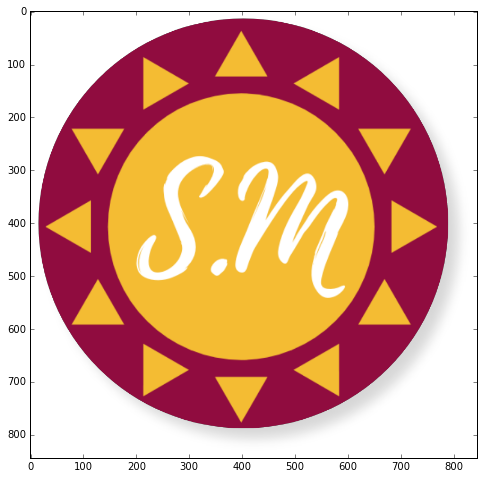

In [67]:
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

About the image -

The image is a colour image i.e. has data in 3 channels - Red, Green, Blue.
Hence the shape of the data - 224 x 224 x 3. It is essentially 224 x 224 matrix for each channel. We need to convert it to grayscale for the sake of simplicity

**Convert the RGB image into Grayscale**

(844L, 844L)
1.0


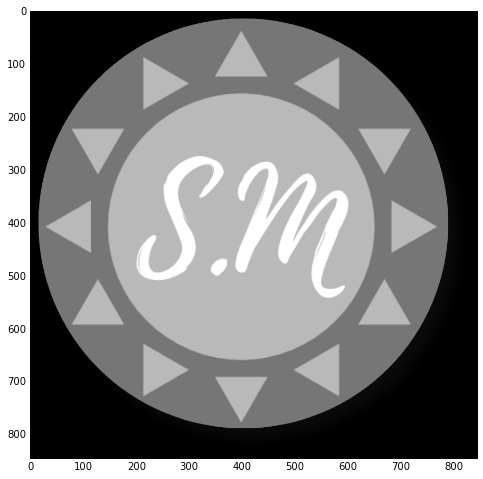

In [68]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

plt.show()

### Performing PCA on the image

1. We'll perform PCA on the matrix with all the components

2. We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture

3. We'll pick a suitable number of components to represent the image for compression

In [69]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

PCA(copy=True, n_components=None, whiten=False)

**Calculating Cumulative Variance**

In [70]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

**No. of Components explaining 85% variance**

Number of components explaining 85% Variance: 2


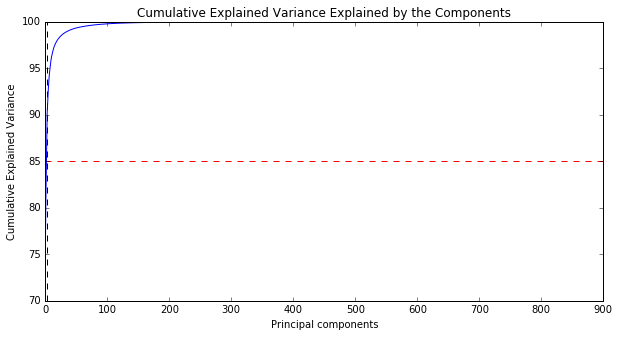

In [71]:
k = np.argmax(var_cumu>85)
print("Number of components explaining 85% Variance: "+ str(k))

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance Explained by the Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=85, color="r", linestyle="--")
ax = plt.plot(var_cumu)

It is found that "16" components, instead of 224 pixels, can explain 85% of the variance in the image

We can reconstruct the image using only 16 components and see if the reconstructed image is visually very different from the original.

** Reconstructing the b/w image with the limited number of components i.e 16**

1. We'll use the "fit_transform" method from the IncrementalPCA module 
2. To first find the 16 PCs and transform and represent the data in those 16 new components/columns.
3. Next, we'll reconstruct the original matrix from these 16 components using the "inverse_transform".
4. Then plot the image to visually to check the quality of it.

In [72]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

**Plotting the reconstructed image**

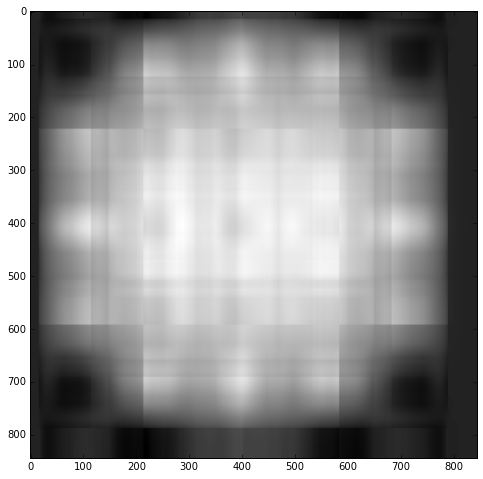

In [73]:
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

All the major details are captured but we can see the lack of clarity. Let's try out a different value of k, say k = 32 components

**Function to reconstruct and plot image for a given number of components**

In [ ]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 32
plt.figure(figsize=[12,8])
plot_at_k(100)

We get better result than previous but still a bit grainy image.


**Reconstructing and plotting for different number of components**
1. We'll try out different number of components, begining from 16, ending at 44
2. we'll reconstruct the image at each k and plot the images

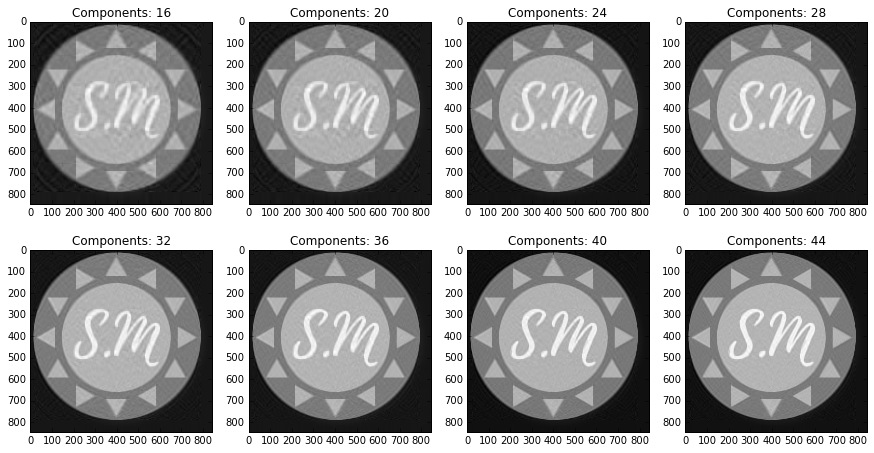

In [75]:
ks = [16, 20, 24, 28, 32, 36, 40, 44]

plt.figure(figsize=[15,7.5])

for i in range(8):
    plt.subplot(2,4,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

We'll looks like after 32, most of the reconstructed images are indistinguishable from the original greyscale. Even 32 components instead of 224 columns is significant compression.

Hence, the dimensionality reduction has taken place with the help of PCA

### Creating PCA for a dataset of bird images
1. PCA tried for 95% and 99% variance capture
2. Separate components are calculated for separate images

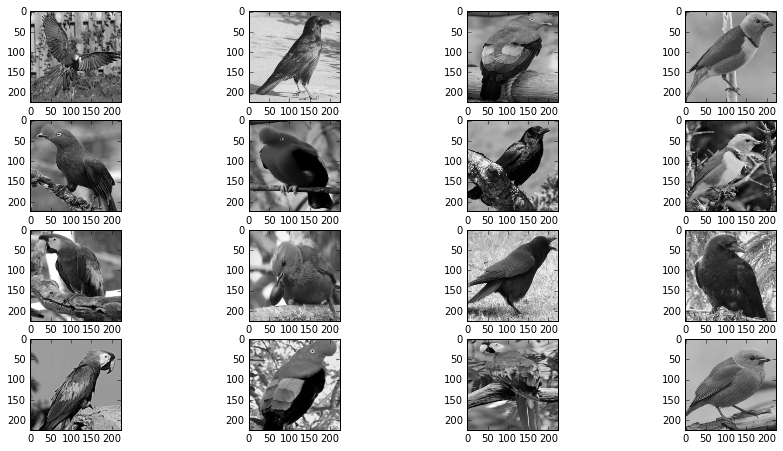

In [84]:
from glob import iglob
from PIL import Image
plt.figure(figsize=[15,7.5])
i=1
for path in iglob('D:/MSC/3 sem/ML Lab/Lab 4/birds/*.jpg'):
 img = Image.open(path).convert('LA')
 f_name=path.split('/')[-1].split('.')[0]
 img.save('D:/MSC/3 sem/ML Lab/Lab 4/'+f_name+'.png')
 plt.subplot(4,4,i)
 plt.imshow(img)
 i+=1

(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)
(224L, 224L)


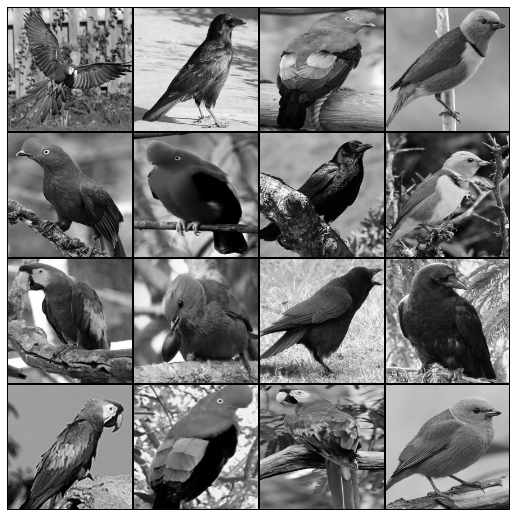

In [87]:
from glob import iglob
import pandas as pd
birds = pd.DataFrame([])
for path in iglob('D:/MSC/3 sem/ML Lab/Lab 4/birds/*.png'):
 img=imread(path)
 img=img[:,:,0:3]
 img1=img.sum(axis=2)
 img = img1 /img1.max() 
 bird = pd.Series(img.flatten(),name=path)
 birds = birds.append(bird)
 print(img.shape)
 
fig, axes = plt.subplots(4,4,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(birds.iloc[i].values.reshape(224,224),cmap="gray")

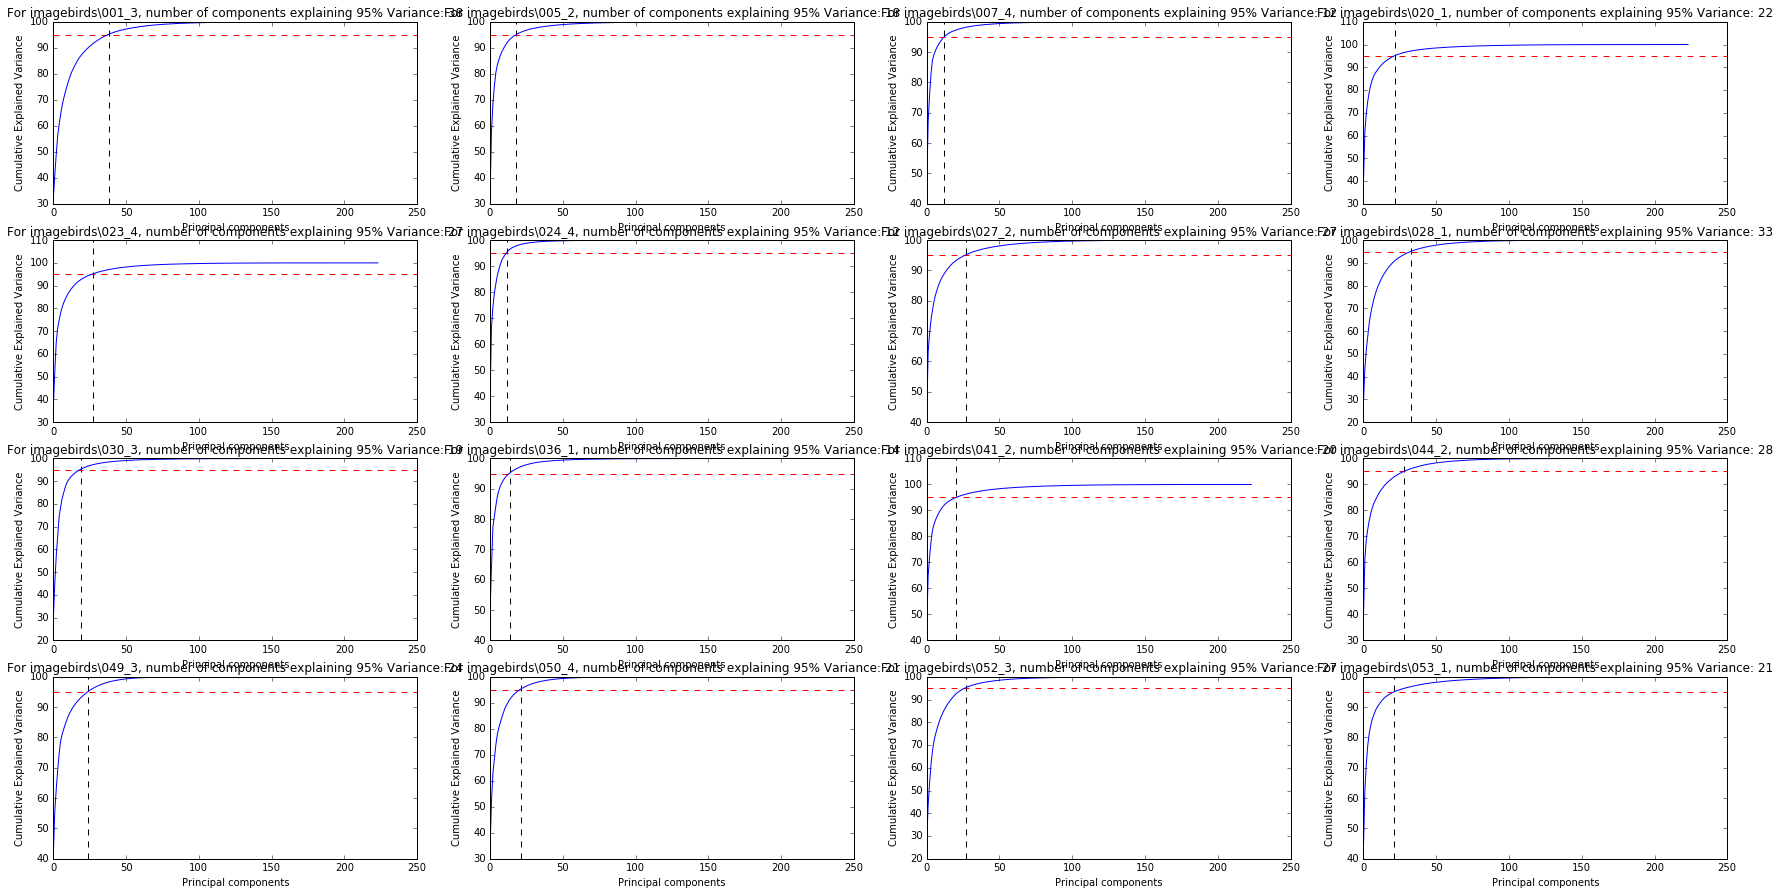

In [88]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[30,15])
comps=[]

for path in iglob('D:/MSC/3 sem/ML Lab/Lab 4/birds/*.png'):
  img=imread(path)
  img=img[:,:,0:3]
  img1=img.sum(axis=2)
  img = img1 /img1.max()
  f_name=path.split('/')[-1].split('.')[0]
  pca = PCA()
  pca.fit(img)

  # Getting the cumulative variance
  # ===============================================

  var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

  # How many PCs explain 95% of the variance?
  # ===============================================

  k = np.argmax(var_cumu>95)
  #print("Number of components explaining 95% Variance: "+ str(k))
  plt.subplot(4,4,i)
  plt.title("For image"+f_name+", number of components explaining 95% Variance: "+ str(k))
  plt.ylabel('Cumulative Explained Variance')
  plt.xlabel('Principal components')
  plt.axvline(x=k, color="k", linestyle="--")
  plt.axhline(y=95, color="r", linestyle="--")
  ax = plt.plot(var_cumu)
  i+=1
  comps.append(k)

('Ratio of compression: ', '9')


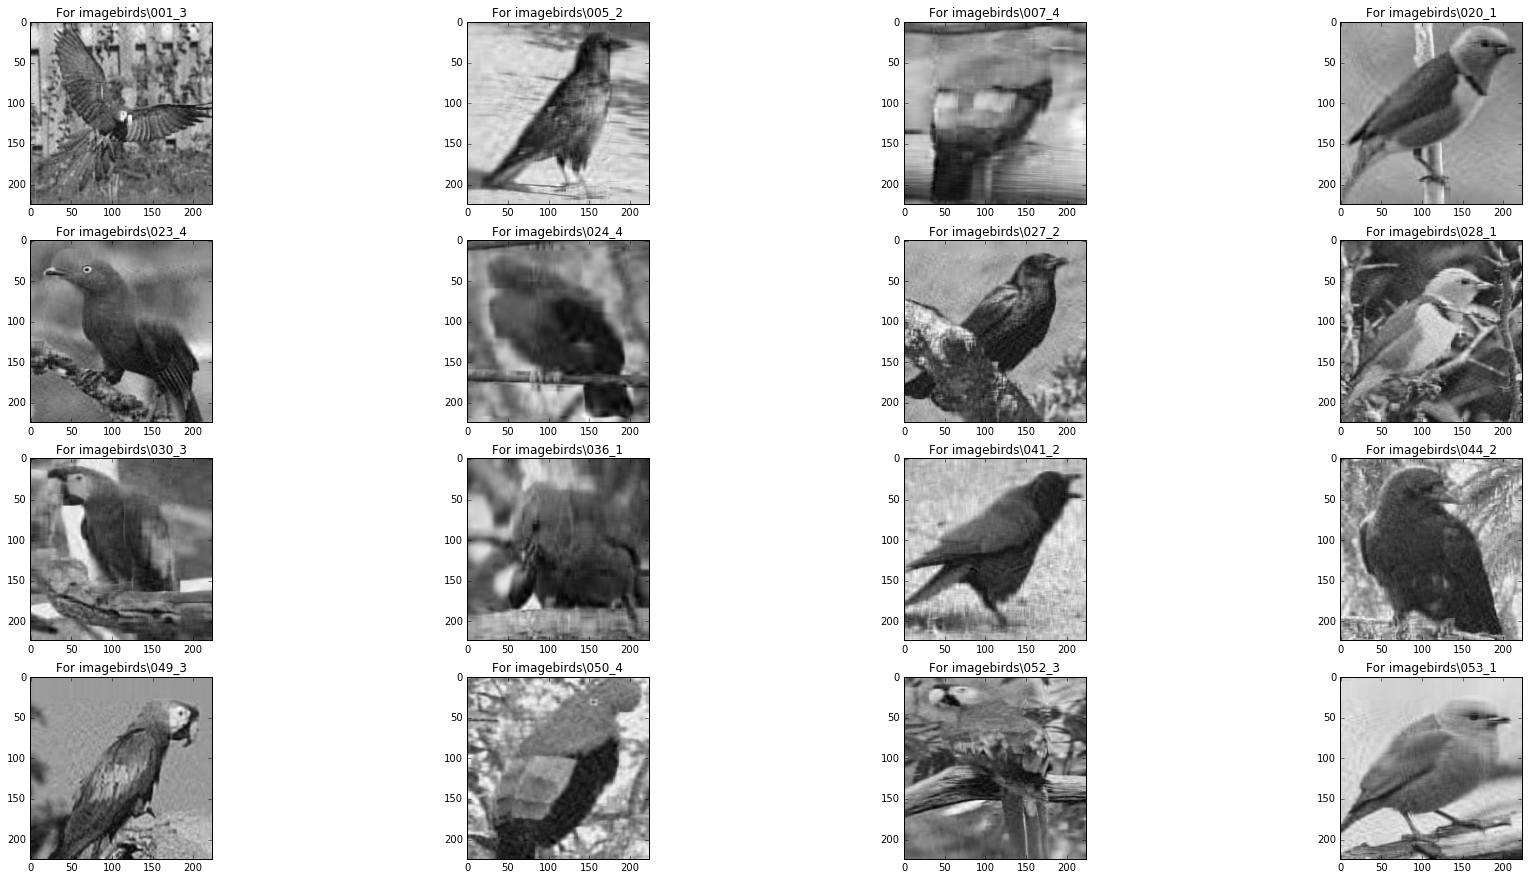

In [89]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[30,15])
  
for path in iglob('D:/MSC/3 sem/ML Lab/Lab 4/birds/*.png'):
  img=imread(path)
  img=img[:,:,0:3]
  img1=img.sum(axis=2)
  img = img1 /img1.max()
  f_name=path.split('/')[-1].split('.')[0]
  ipca = IncrementalPCA(n_components=comps[i-1])
  image_recon = ipca.inverse_transform(ipca.fit_transform(img))

  plt.subplot(4,4,i)
  plt.title("For image"+f_name)
  plt.imshow(image_recon,cmap = plt.cm.gray)
  i+=1

v_comp=sum(comps)
print("Ratio of compression: ",str((16*224)/v_comp)[:6])

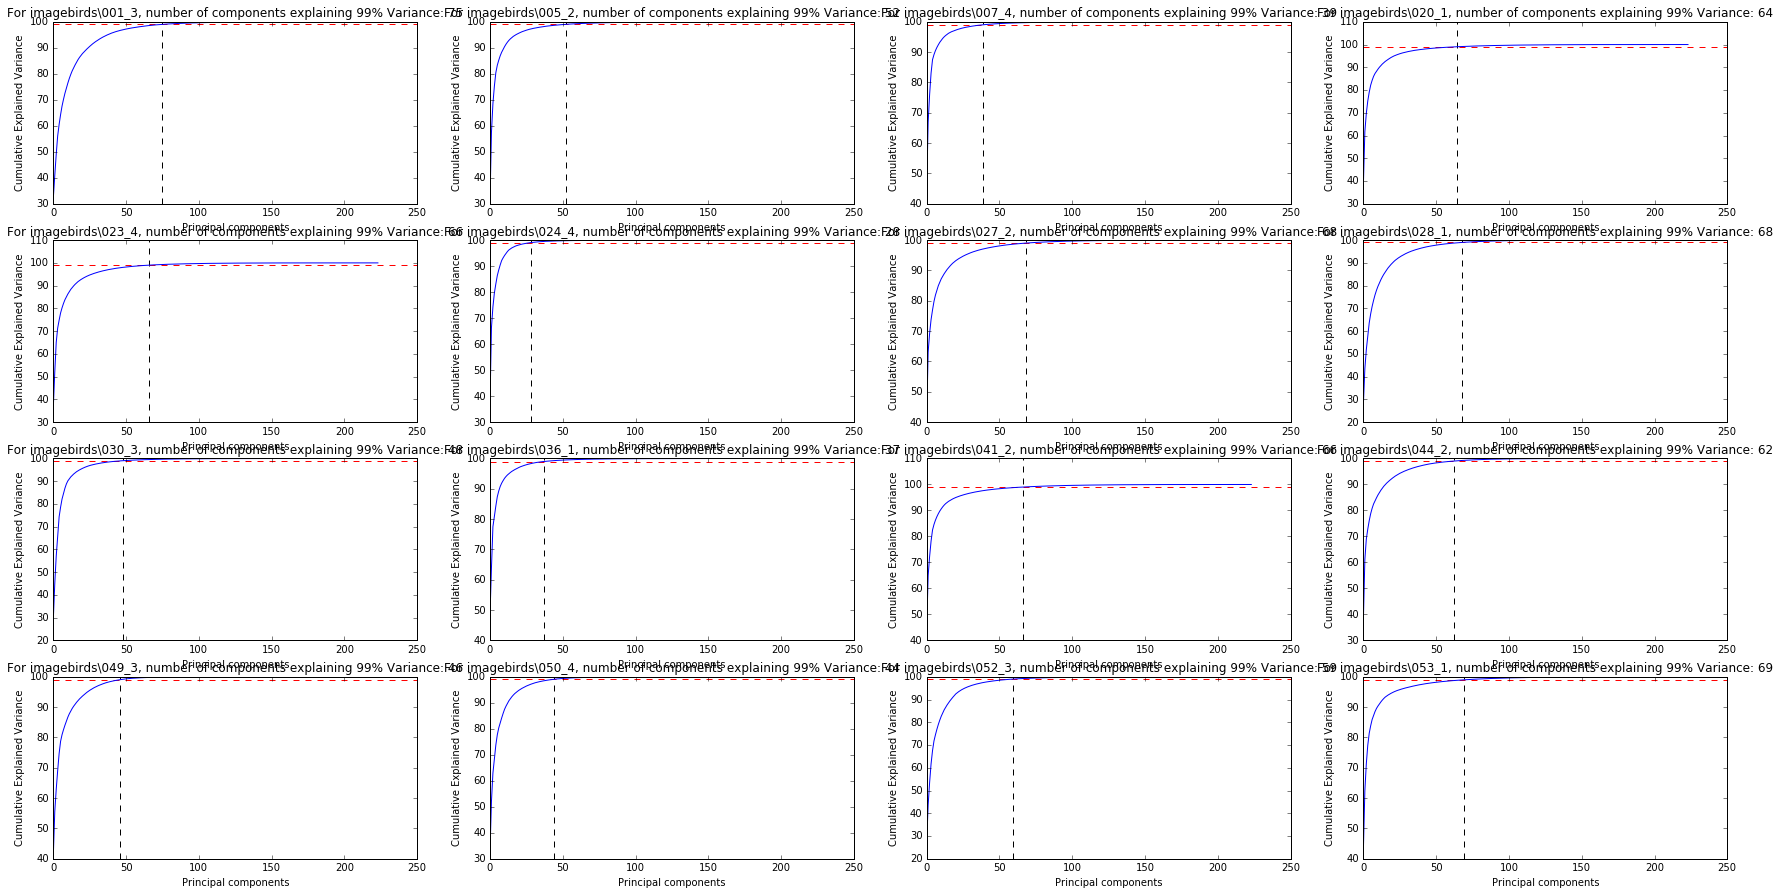

In [90]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[30,15])
comps1=[]

for path in iglob('D:/MSC/3 sem/ML Lab/Lab 4/birds/*.png'):
  img=imread(path)
  img=img[:,:,0:3]
  img1=img.sum(axis=2)
  img = img1 /img1.max()
  f_name=path.split('/')[-1].split('.')[0]
  pca = PCA()
  pca.fit(img)

  # Getting the cumulative variance
  # ===============================================

  var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

  # How many PCs explain 99% of the variance?
  # ===============================================

  k = np.argmax(var_cumu>99)
  #print("Number of components explaining 99% Variance: "+ str(k))
  plt.subplot(4,4,i)
  plt.title("For image"+f_name+", number of components explaining 99% Variance: "+ str(k))
  plt.ylabel('Cumulative Explained Variance')
  plt.xlabel('Principal components')
  plt.axvline(x=k, color="k", linestyle="--")
  plt.axhline(y=99, color="r", linestyle="--")
  ax = plt.plot(var_cumu)
  i+=1
  comps1.append(k)

Ratio of compression:  4.0405


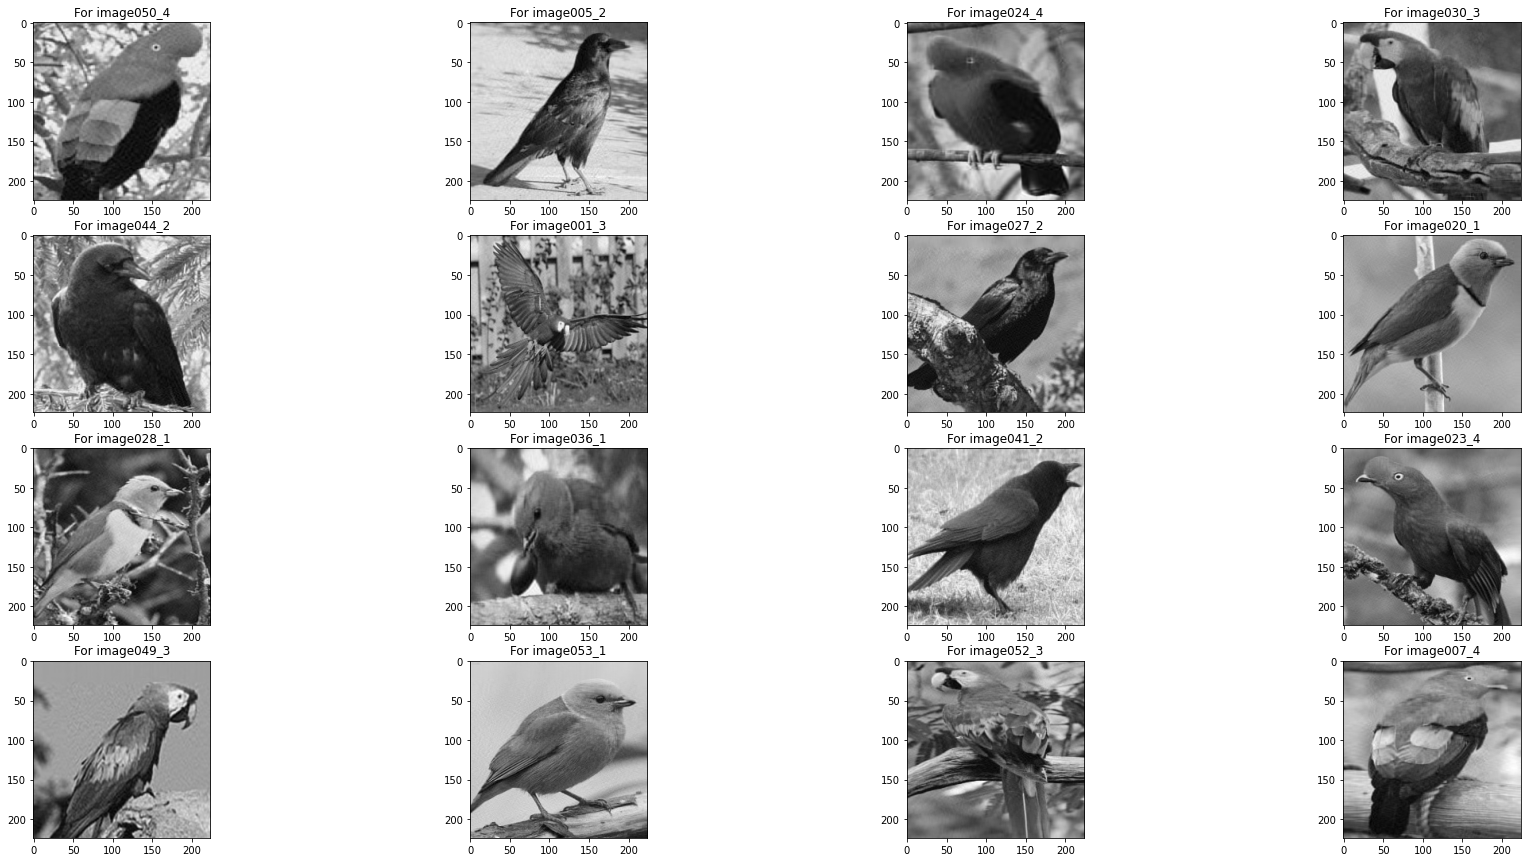

In [67]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[30,15])
  
for path in iglob('/content/Birds-Test/*.png'):
  img=imread(path)
  img=img[:,:,0:3]
  img1=img.sum(axis=2)
  img = img1 /img1.max()
  f_name=path.split('/')[-1].split('.')[0]
  ipca = IncrementalPCA(n_components=comps1[i-1])
  image_recon = ipca.inverse_transform(ipca.fit_transform(img))

  plt.subplot(4,4,i)
  plt.title("For image"+f_name)
  plt.imshow(image_recon,cmap = plt.cm.gray)
  i+=1

v_comp1=sum(comps1)
print("Ratio of compression: ",str((16*224)/v_comp1)[:6])

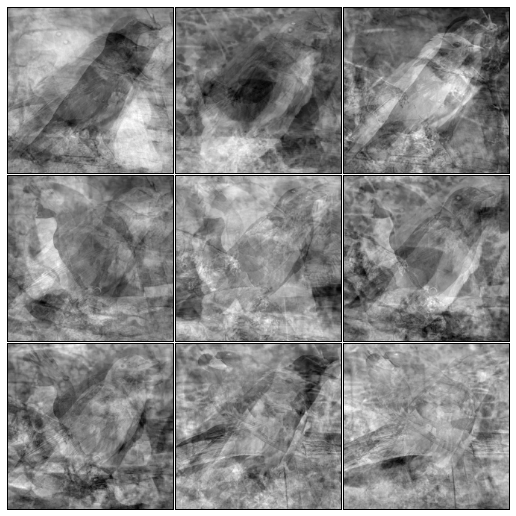

In [92]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
birds_pca = PCA(n_components=.8)
birds_pca.fit(birds)
fig, axes = plt.subplots(3,3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(birds_pca.components_[i].reshape(224,224),cmap="gray")

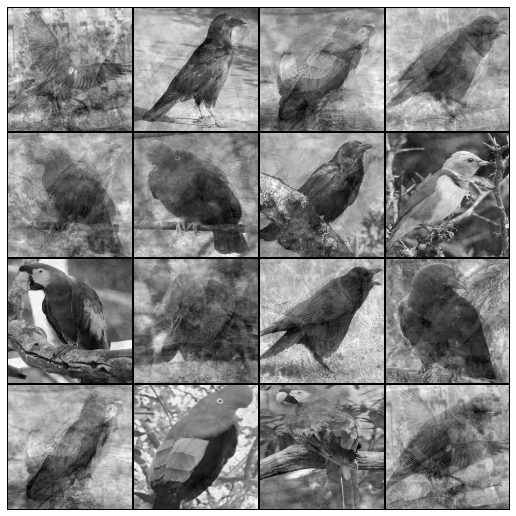

In [93]:
components = birds_pca.transform(birds)
projected = birds_pca.inverse_transform(components)
fig, axes = plt.subplots(4,4,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(224,224),cmap="gray")